In [ ]:
#Conexion con drive
from google.colab import drive
drive.mount("/drive",force_remount=True)

Mounted at /drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge


In [ ]:
#Import pandas , csv 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Info del documento
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [ ]:
#Describiendo todas las columnas de un DataFrame independientemente del tipo de datos.
df.describe(include='all') 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
#Pandas elimina filas con valores NaN para cualquier columna usando el método DataFrame.dropna()
df = df.dropna()
print("DataFrame after removing rows with NaN value in any column:")
print(df)

DataFrame after removing rows with NaN value in any column:
               hotel  is_canceled  lead_time  arrival_date_year  \
2392    Resort Hotel            0          6               2015   
2697    Resort Hotel            0         24               2015   
2867    Resort Hotel            0         24               2015   
2877    Resort Hotel            0         24               2015   
2878    Resort Hotel            0         24               2015   
...              ...          ...        ...                ...   
112499    City Hotel            0         13               2017   
113046    City Hotel            0         13               2017   
113082    City Hotel            0         13               2017   
113627    City Hotel            0        210               2017   
116451    City Hotel            0        191               2017   

       arrival_date_month  arrival_date_week_number  \
2392              October                        42   
2697              October

In [ ]:
#Eliminar los duplicados
df.duplicated()

2392      False
2697      False
2867      False
2877      False
2878      False
          ...  
112499    False
113046    False
113082    False
113627    False
116451    False
Length: 217, dtype: bool

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
df['babies'].value_counts()

0    217
Name: babies, dtype: int64

eliminar babies y dias de espera

In [ ]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,-0.039767,-0.069527,-0.003159,0.002215,-0.133996,-0.105148,-0.032118,0.027563,NaN,-0.011839,-0.019837,-0.012140,0.015698,-0.034460,-0.043769,NaN,-0.057069,-0.092895,-0.105983
lead_time,-0.039767,1.000000,0.232138,0.106130,0.068615,0.097390,-0.001527,0.345290,-0.061248,NaN,-0.136182,-0.024873,-0.102228,-0.052918,-0.369766,0.249593,NaN,0.240089,-0.089066,-0.001975
arrival_date_year,-0.069527,0.232138,1.000000,-0.768645,0.367765,-0.293971,-0.437521,0.105956,0.145736,NaN,0.278636,0.145344,0.206977,-0.482208,-0.175110,-0.037900,NaN,0.495254,-0.073376,0.399946
arrival_date_week_number,-0.003159,0.106130,-0.768645,1.000000,-0.147198,0.310536,0.424158,-0.022524,-0.113531,NaN,-0.348873,-0.175642,-0.208829,0.407445,0.068700,0.266991,NaN,-0.316452,0.001284,-0.233704
arrival_date_day_of_month,0.002215,0.068615,0.367765,-0.147198,1.000000,-0.148268,-0.322588,0.071086,0.158432,NaN,0.164811,0.172475,0.119611,-0.268911,-0.252158,-0.042122,NaN,0.275325,-0.038957,0.338099
stays_in_weekend_nights,-0.133996,0.097390,-0.293971,0.310536,-0.148268,1.000000,0.841841,-0.109940,-0.140356,NaN,-0.054922,-0.025897,-0.004918,0.341655,-0.038306,0.113399,NaN,-0.192612,0.092679,-0.013472
stays_in_week_nights,-0.105148,-0.001527,-0.437521,0.424158,-0.322588,0.841841,1.000000,-0.153215,-0.106640,NaN,-0.166413,-0.069705,-0.045755,0.498610,0.169143,0.113393,NaN,-0.352100,0.087073,-0.138681
adults,-0.032118,0.345290,0.105956,-0.022524,0.071086,-0.109940,-0.153215,1.000000,0.180337,NaN,-0.075300,-0.053748,-0.051119,-0.102568,-0.292686,-0.097755,NaN,0.413196,-0.098274,0.071058
children,0.027563,-0.061248,0.145736,-0.113531,0.158432,-0.140356,-0.106640,0.180337,1.000000,NaN,0.113186,-0.010801,0.216683,-0.083999,-0.071879,0.064336,NaN,0.397079,-0.050577,0.087897
babies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 2392 to 46695
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           161 non-null    object 
 1   is_canceled                     161 non-null    int64  
 2   lead_time                       161 non-null    int64  
 3   arrival_date_year               161 non-null    int64  
 4   arrival_date_month              161 non-null    object 
 5   arrival_date_week_number        161 non-null    int64  
 6   arrival_date_day_of_month       161 non-null    int64  
 7   stays_in_weekend_nights         161 non-null    int64  
 8   stays_in_week_nights            161 non-null    int64  
 9   adults                          161 non-null    int64  
 10  children                        161 non-null    float64
 11  babies                          161 non-null    int64  
 12  meal                           

VISUALIZACIONES

In [ ]:
#1 top 5

top5=df.groupby('company')['stays_in_weekend_nights'].sum().sort_values().tail(5)

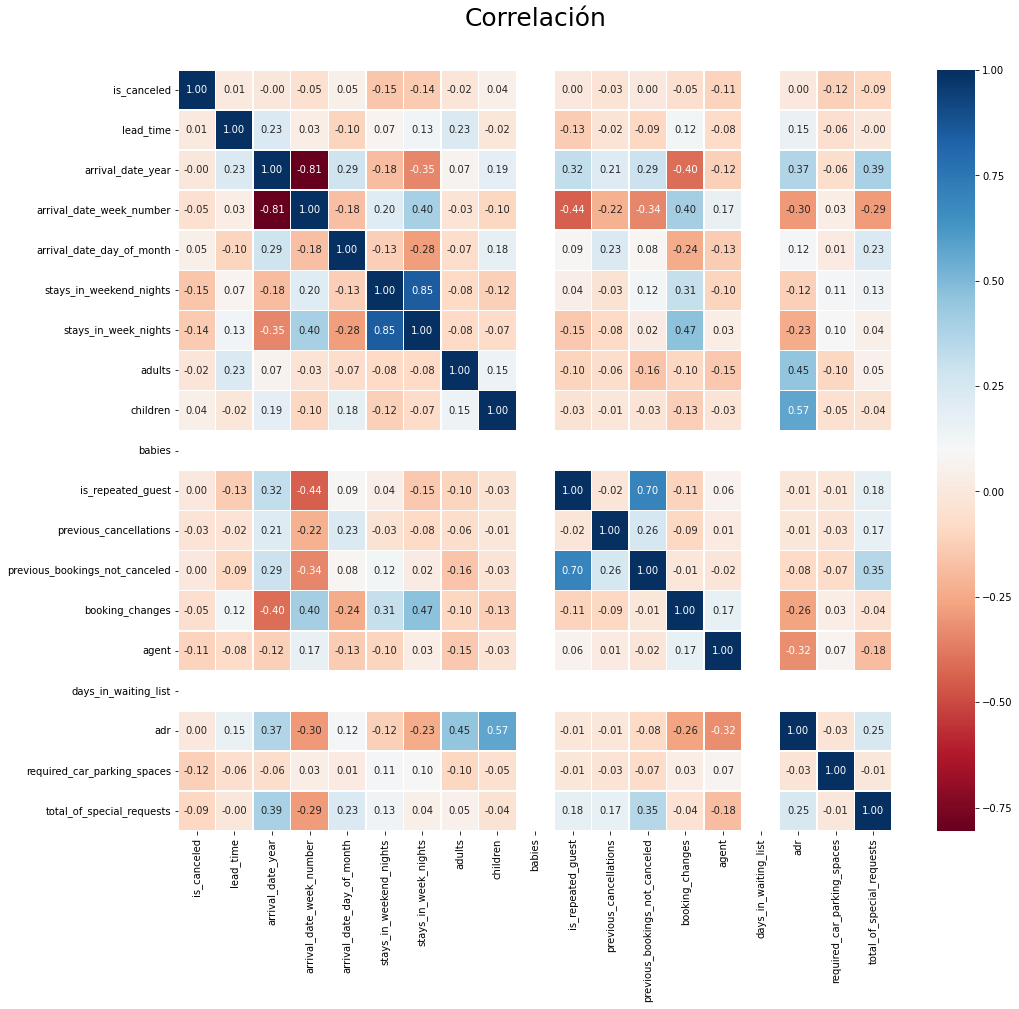

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Correlación', y=1.05, size=25,)
sns.heatmap(df.corr(),linewidths=0.5,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f')
plt.savefig("Plot generated using Matplotlib6.png")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
label = etiq.fit_transform(df["reservation_status_date"])
lb= {index: label for index, label in 
                  enumerate(etiq.classes_)}
lb

{0: '2015-08-09',
 1: '2015-08-10',
 2: '2015-08-12',
 3: '2015-08-14',
 4: '2015-08-15',
 5: '2015-09-05',
 6: '2015-09-21',
 7: '2015-10-13',
 8: '2015-10-23',
 9: '2015-10-30',
 10: '2015-11-04',
 11: '2015-11-06',
 12: '2015-11-07',
 13: '2015-11-08',
 14: '2015-11-09',
 15: '2015-11-10',
 16: '2015-11-11',
 17: '2015-11-12',
 18: '2015-11-14',
 19: '2015-11-15',
 20: '2015-11-16',
 21: '2015-11-17',
 22: '2015-11-25',
 23: '2015-12-02',
 24: '2015-12-11',
 25: '2016-01-08',
 26: '2016-01-16',
 27: '2016-02-18',
 28: '2016-03-17',
 29: '2016-04-04',
 30: '2016-05-03',
 31: '2016-05-11',
 32: '2016-05-16',
 33: '2016-05-17',
 34: '2016-07-05',
 35: '2016-07-10',
 36: '2016-09-03',
 37: '2016-09-12',
 38: '2016-10-17',
 39: '2016-11-29',
 40: '2016-12-22',
 41: '2016-12-24',
 42: '2017-01-06',
 43: '2017-01-25',
 44: '2017-02-01',
 45: '2017-03-02',
 46: '2017-03-07',
 47: '2017-03-12',
 48: '2017-05-15',
 49: '2017-06-13',
 50: '2017-06-20',
 51: '2017-07-17',
 52: '2017-08-18',
 53

In [ ]:
df["reservation_status_date"] = label
df["reservation_status_date"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


19    66
20    12
21     9
14     6
18     6
32     4
3      3
8      3
44     3
30     3
39     2
2      2
42     1
43     1
7      1
41     1
40     1
47     1
46     1
52     1
49     1
50     1
51     1
36     1
53     1
1      1
0      1
4      1
5      1
6      1
37     1
28     1
35     1
34     1
11     1
10     1
15     1
16     1
17     1
31     1
38     1
48     1
24     1
9      1
22     1
33     1
12     1
13     1
45     1
23     1
25     1
27     1
29     1
26     1
Name: reservation_status_date, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
label = etiq.fit_transform(df["hotel"])
lb= {index: label for index, label in 
                  enumerate(etiq.classes_)}
lb

{0: 'City Hotel', 1: 'Resort Hotel'}

In [ ]:
df["hotel"] = label
df["hotel"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    150
0     11
Name: hotel, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
label = etiq.fit_transform(df["is_canceled"])
lb= {index: label for index, label in 
                  enumerate(etiq.classes_)}
lb

{0: 0, 1: 1}

In [ ]:
df["is_canceled"] = label
df["is_canceled"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    145
1     16
Name: is_canceled, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
label = etiq.fit_transform(df["arrival_date_month"])
lb= {index: label for index, label in 
                  enumerate(etiq.classes_)}
lb

{0: 'April',
 1: 'August',
 2: 'December',
 3: 'February',
 4: 'January',
 5: 'July',
 6: 'June',
 7: 'March',
 8: 'May',
 9: 'November',
 10: 'October',
 11: 'September'}

In [ ]:
df["arrival_date_month"] = label
df["arrival_date_month"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


9     109
1      12
8       9
10      7
4       7
7       4
6       3
2       3
5       3
11      2
3       1
0       1
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


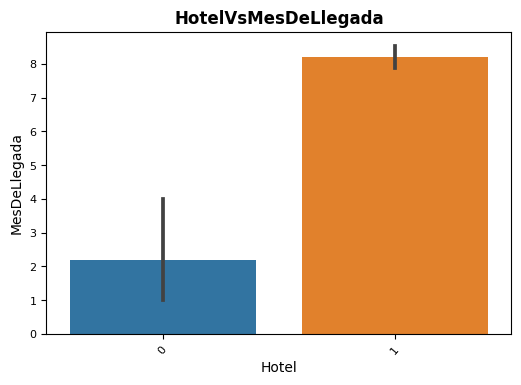

In [ ]:
plt.figure(dpi=100)
sns.barplot(df["hotel"], df["arrival_date_month"])

plt.title("HotelVsMesDeLlegada", fontsize=12, fontweight="bold")
plt.tick_params(axis="x", labelsize=8, rotation=50)
plt.tick_params(axis="y", labelsize=8)
plt.ylabel("MesDeLlegada", fontsize = 10)
plt.xlabel("Hotel", fontsize = 10)

plt.show()

Intercepto: 0.9809523809523814
Coeficientes: [-0.0913538  -0.0340291   0.41727115  0.43895962]


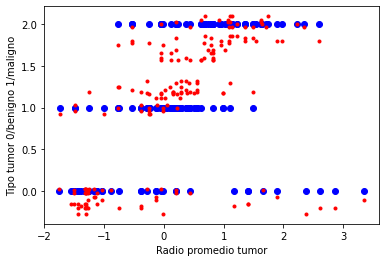

In [ ]:
#REGRESIÓN RIDGE

from sklearn.linear_model import Ridge

rid_clf = Ridge(alpha=0) #probar cambiar alpha
rid_clf.fit(X_train, y_train)

print('Intercepto:', rid_clf.intercept_, )
print('Coeficientes:', rid_clf.coef_ )

plt.plot(X_test, y_test,'bo')
plt.plot(X_test, rid_clf.predict(X_test),'r.')
plt.xlabel('Radio promedio tumor')
plt.ylabel('Tipo tumor 0/benigno 1/maligno')
plt.show()

Intercepto: [-0.31428571 -0.33333333 -0.35238095]
Coeficientes: [[ 0.04658888  0.23962994 -0.61021032 -0.20610255]
 [ 0.03431077 -0.39346991  0.45480584 -0.47064518]
 [-0.08089965  0.15383997  0.15540448  0.67674773]]


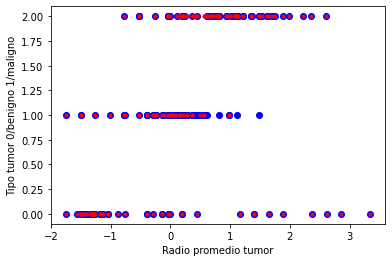

In [ ]:
from sklearn.linear_model import RidgeClassifier

rid_clf = RidgeClassifier(alpha=1) #probar cambiar alpha
rid_clf.fit(X_train, y_train)

print('Intercepto:', rid_clf.intercept_, )
print('Coeficientes:', rid_clf.coef_ )

plt.plot(X_test, y_test,'bo')
plt.plot(X_test, rid_clf.predict(X_test),'r.')
plt.xlabel('Radio promedio tumor')
plt.ylabel('Tipo tumor 0/benigno 1/maligno')
plt.show()

In [ ]:
# Visualizar la curva ROC
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(RidgeClassifier, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: ignored

In [ ]:
df.info(object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 2392 to 46695
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           161 non-null    int64  
 1   is_canceled                     161 non-null    int64  
 2   lead_time                       161 non-null    int64  
 3   arrival_date_year               161 non-null    int64  
 4   arrival_date_month              161 non-null    int64  
 5   arrival_date_week_number        161 non-null    int64  
 6   arrival_date_day_of_month       161 non-null    int64  
 7   stays_in_weekend_nights         161 non-null    int64  
 8   stays_in_week_nights            161 non-null    int64  
 9   adults                          161 non-null    int64  
 10  children                        161 non-null    float64
 11  babies                          161 non-null    int64  
 12  meal                           

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.select_dtypes(exclude='int64').columns

Index(['children', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
X=df[["hotel","is_canceled"]].to_numpy()

In [ ]:
X = df.drop(columns=["hotel","is_canceled"])
y = df["hotel"]

In [ ]:
X

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,6,2015,10,42,11,2,0,2,0.0,0,...,No Deposit,240.0,113.0,0.0,Transient,82.0,1.0,1.0,Check-Out,7
2697,24,2015,10,44,26,7,15,1,0.0,0,...,No Deposit,185.0,281.0,0.0,Transient-Party,52.2,0.0,0.0,Check-Out,21
2867,24,2015,9,45,3,0,3,2,0.0,0,...,No Deposit,334.0,281.0,0.0,Transient-Party,48.0,0.0,0.0,Check-Out,11
2877,24,2015,9,45,3,2,10,1,0.0,0,...,No Deposit,328.0,281.0,0.0,Transient-Party,40.0,0.0,0.0,Check-Out,19
2878,24,2015,9,45,3,3,10,2,0.0,0,...,No Deposit,326.0,281.0,0.0,Transient-Party,48.0,0.0,0.0,Check-Out,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41005,0,2015,1,33,10,1,3,2,0.0,0,...,No Deposit,9.0,9.0,0.0,Transient,115.0,0.0,0.0,Check-Out,3
41142,0,2015,1,33,13,0,2,2,0.0,0,...,No Deposit,9.0,9.0,0.0,Transient,85.0,0.0,0.0,Check-Out,4
42126,1,2015,1,36,31,1,4,1,0.0,0,...,No Deposit,9.0,9.0,0.0,Contract,92.0,0.0,2.0,Check-Out,5
43580,19,2015,11,39,20,1,0,2,0.0,0,...,No Deposit,14.0,84.0,0.0,Transient,124.0,0.0,0.0,Check-Out,6


In [ ]:
df.info

<bound method DataFrame.info of        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2392       1            0          6               2015                  10   
2697       1            0         24               2015                  10   
2867       1            0         24               2015                   9   
2877       1            0         24               2015                   9   
2878       1            0         24               2015                   9   
...      ...          ...        ...                ...                 ...   
41005      0            0          0               2015                   1   
41142      0            0          0               2015                   1   
42126      0            0          1               2015                   1   
43580      0            0         19               2015                  11   
46695      0            1          1               2016                   4   

       arrival_date

KNN

In [ ]:
X = df.drop(columns=['hotel','is_canceled']) 
y = df['hotel']

In [ ]:
X

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,6,2015,10,42,11,2,0,2,0.0,0,...,No Deposit,240.0,113.0,0.0,Transient,82.0,1.0,1.0,Check-Out,7
2697,24,2015,10,44,26,7,15,1,0.0,0,...,No Deposit,185.0,281.0,0.0,Transient-Party,52.2,0.0,0.0,Check-Out,21
2867,24,2015,9,45,3,0,3,2,0.0,0,...,No Deposit,334.0,281.0,0.0,Transient-Party,48.0,0.0,0.0,Check-Out,11
2877,24,2015,9,45,3,2,10,1,0.0,0,...,No Deposit,328.0,281.0,0.0,Transient-Party,40.0,0.0,0.0,Check-Out,19
2878,24,2015,9,45,3,3,10,2,0.0,0,...,No Deposit,326.0,281.0,0.0,Transient-Party,48.0,0.0,0.0,Check-Out,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41005,0,2015,1,33,10,1,3,2,0.0,0,...,No Deposit,9.0,9.0,0.0,Transient,115.0,0.0,0.0,Check-Out,3
41142,0,2015,1,33,13,0,2,2,0.0,0,...,No Deposit,9.0,9.0,0.0,Transient,85.0,0.0,0.0,Check-Out,4
42126,1,2015,1,36,31,1,4,1,0.0,0,...,No Deposit,9.0,9.0,0.0,Contract,92.0,0.0,2.0,Check-Out,5
43580,19,2015,11,39,20,1,0,2,0.0,0,...,No Deposit,14.0,84.0,0.0,Transient,124.0,0.0,0.0,Check-Out,6


In [ ]:
df.info

<bound method DataFrame.info of        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2392       1            0          6               2015                  10   
2697       1            0         24               2015                  10   
2867       1            0         24               2015                   9   
2877       1            0         24               2015                   9   
2878       1            0         24               2015                   9   
...      ...          ...        ...                ...                 ...   
41005      0            0          0               2015                   1   
41142      0            0          0               2015                   1   
42126      0            0          1               2015                   1   
43580      0            0         19               2015                  11   
46695      0            1          1               2016                   4   

       arrival_date

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=12, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5, random_state=12, stratify=y_val)

In [ ]:
print("Muestras de entrenamiento", X_train.shape)
print("Muestras de validacion", X_val.shape)
print("Muestras de test", X_test.shape)

Muestras de entrenamiento (105, 4)
Muestras de validacion (22, 4)
Muestras de test (23, 4)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val =scaler.transform(X_val)

In [ ]:
from sklearn.metrics import recall_score
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))


Valores predichos [2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2]
Valores reales [2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2]
Accuracy: 0.9565217391304348
Recall: 0.9583333333333334


In [ ]:
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))

[2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0]
[2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0]
Accuracy: 0.9777777777777777


In [ ]:
# defining parameter range
grid_search = GridSearchCV(knn, param_grid, cv=2, scoring="f1", return_train_score=True,verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.get_params()

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zero_division=zero_division,
  File "/usr/local/lib/py

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:',knn.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2]
Valores reales [2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2]
Accuracy: 1.0
Recall: 1.0


In [ ]:
validacion = knn.predict(X_val)

In [ ]:
print(classification_report(y_val, validacion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



Se obtienen muy buenos resultados para ambas clases.

In [ ]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number, cmap="Blues")
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()
    plt.grid(visible=None)

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="w", fontsize=16)

    plt.show()

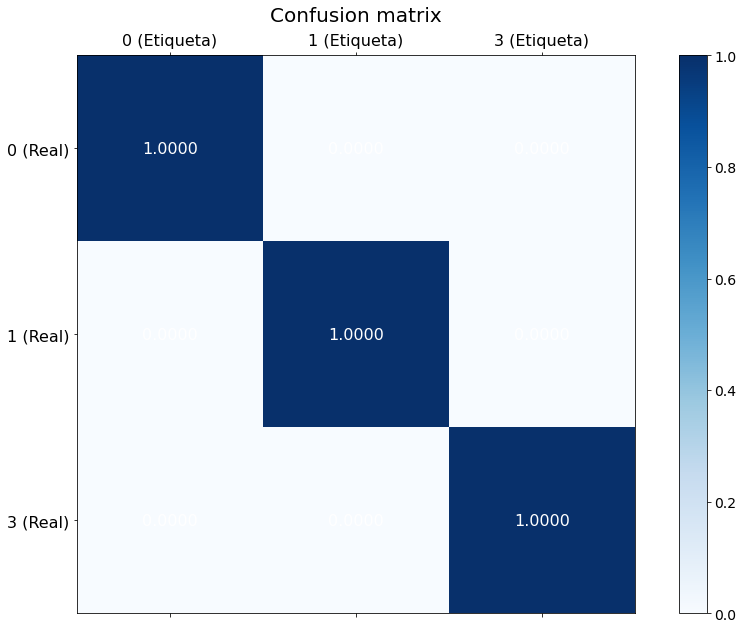

In [ ]:
cm = metrics.confusion_matrix(y_val,validacion)
plotCMa(cm,['0','1','3'])

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plt.figure(dpi=100)
plot_roc_curve(knn, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

RANDOM FOREST 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=1, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5, random_state=1, stratify=y_val)

In [ ]:
print("Muestras de entrenamiento", X_train.shape)
print("Muestras de validacion", X_val.shape)
print("Muestras de test", X_test.shape)

Muestras de entrenamiento (105, 4)
Muestras de validacion (22, 4)
Muestras de test (23, 4)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=50)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)
print('Accuracy:', rndf_clf.score(X_test, y_pred))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Accuracy: 1.0
Recall: 0.9583333333333334


In [ ]:
param_grid = [{'n_estimators':np.arange(0, 15, 1)}]

forest_clf = RandomForestClassifier()


grid_search = GridSearchCV(forest_clf, param_grid, cv=2, scoring="recall", return_train_score=True, verbose=1)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_.get_params()

Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

ValueError: ignored

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

AttributeError: ignored

In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=13)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:', rndf_clf.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1]
Valores reales [1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1]
Accuracy: 0.9565217391304348
Recall: 0.9583333333333334


In [ ]:
validacion = rndf_clf.predict(X_val)

print('Accuracy:', rndf_clf.score(X_val, y_val))
print('Recall:',recall_score(y_val, validacion, average="macro"))

Accuracy: 1.0
Recall: 1.0


In [ ]:
print(classification_report(y_val, validacion))

NameError: ignored

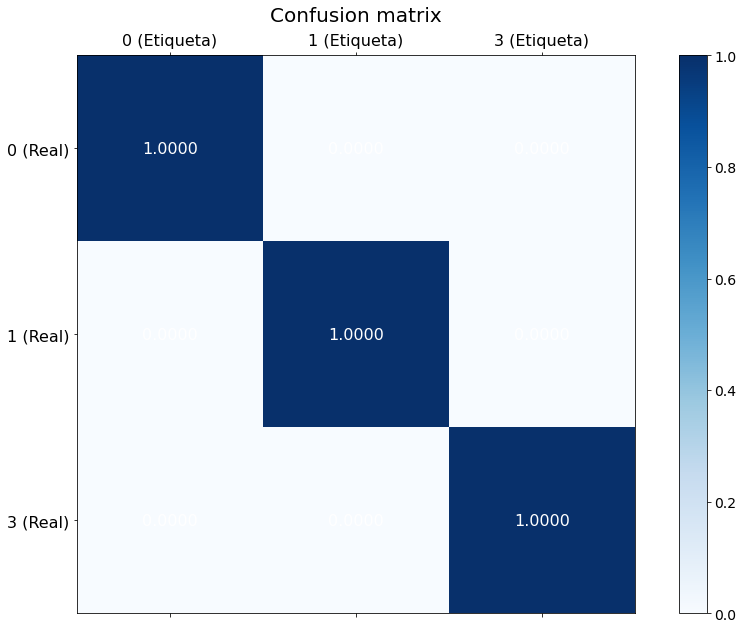

In [ ]:
cm = metrics.confusion_matrix(y_val,validacion)
plotCMa(cm,['0','1','3'])

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plt.figure(dpi=100)
plot_roc_curve(rndf_clf, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

<Figure size 600x400 with 0 Axes>

ARBOLES DE DECISIONES

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=123, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5, random_state=123, stratify=y_val)

In [ ]:
print("Muestras de entrenamiento", X_train.shape)
print("Muestras de validacion", X_val.shape)
print("Muestras de test", X_test.shape)

Muestras de entrenamiento (105, 4)
Muestras de validacion (22, 4)
Muestras de test (23, 4)


In [ ]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train) 
y_pred = tree_clf.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:', tree_clf.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2]
Valores reales [2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1]
Accuracy: 0.9565217391304348
Recall: 0.9583333333333334


In [ ]:
m_depth = list(range(1, 10))
param_grid = dict(max_depth=m_depth)
  
# defining parameter range
grid_search = GridSearchCV(tree_clf, param_grid, cv=2, scoring="accuracy", return_train_score=True,verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.get_params()

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train) 
y_pred = tree_clf.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:', tree_clf.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2]
Valores reales [2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1]
Accuracy: 0.9565217391304348
Recall: 0.9583333333333334


In [ ]:
validacion = tree_clf.predict(X_val)

In [ ]:
print(classification_report(y_val, validacion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.71      0.71      0.71         7
           2       0.71      0.71      0.71         7

    accuracy                           0.82        22
   macro avg       0.81      0.81      0.81        22
weighted avg       0.82      0.82      0.82        22



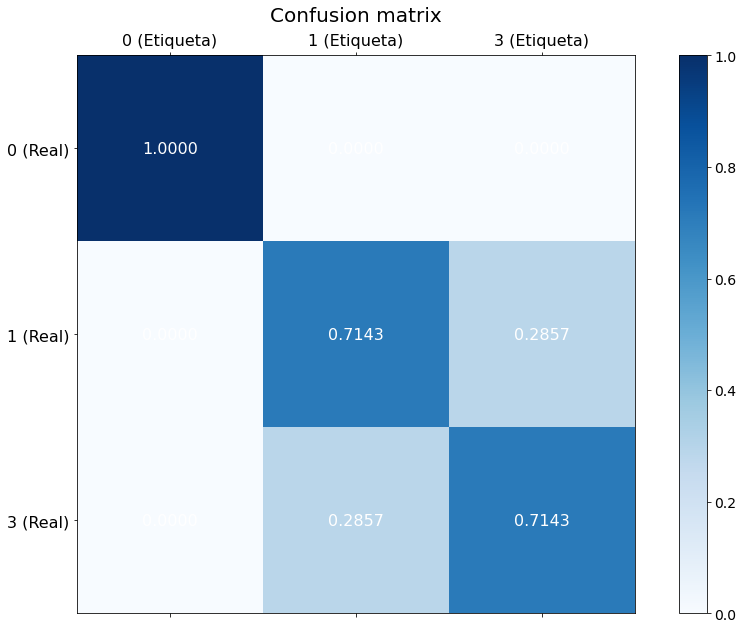

In [ ]:
cm = metrics.confusion_matrix(y_val,validacion)
plotCMa(cm,['0','1','3'])

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plt.figure(dpi=100)
plot_roc_curve(tree_clf, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

<Figure size 600x400 with 0 Axes>


RED RIDGE



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=123, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5, random_state=123, stratify=y_val)

In [ ]:
print("Muestras de entrenamiento", X_train.shape)
print("Muestras de validacion", X_val.shape)
print("Muestras de test", X_test.shape)

Muestras de entrenamiento (105, 4)
Muestras de validacion (22, 4)
Muestras de test (23, 4)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
rid_clf = RidgeClassifier(alpha=0)
rid_clf.fit(X_train, y_train)
y_pred = rid_clf.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:', rid_clf.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1]
Valores reales [2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1]
Accuracy: 0.8695652173913043
Recall: 0.875


In [ ]:
l_alpha=list(np.arange(0.1, 1, 0.1))
param_grid = dict(alpha=l_alpha)
  
# defining parameter range
grid_search = GridSearchCV(rid_clf, param_grid, cv=2, scoring="accuracy", return_train_score=True,verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.get_params()

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'alpha': 0.30000000000000004,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
rid_clf = RidgeClassifier(alpha=0.1)
rid_clf.fit(X_train, y_train)
y_pred = rid_clf.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:', rid_clf.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1]
Valores reales [2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1]
Accuracy: 0.8695652173913043
Recall: 0.875


In [ ]:
validacion = rid_clf.predict(X_val)

In [ ]:
print(classification_report(y_val, validacion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.29      0.44         7
           2       0.58      1.00      0.74         7

    accuracy                           0.77        22
   macro avg       0.86      0.76      0.73        22
weighted avg       0.87      0.77      0.74        22



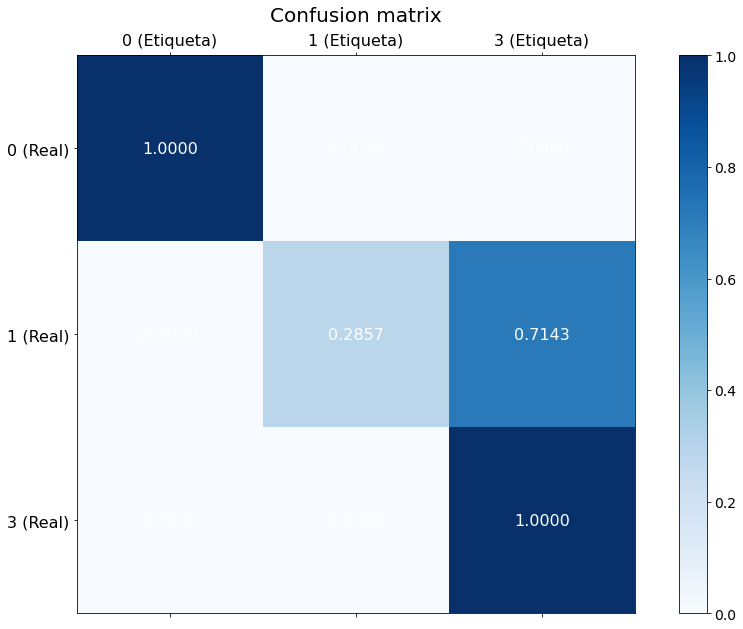

In [ ]:
cm = metrics.confusion_matrix(y_val,validacion)
plotCMa(cm,['0','1','3'])

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plt.figure(dpi=100)
plot_roc_curve(rid_clf, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

<Figure size 600x400 with 0 Axes>

REGRESION LOGISTICA

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=1234, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5, random_state=1234, stratify=y_val)

In [ ]:
print("Muestras de entrenamiento", X_train.shape)
print("Muestras de validacion", X_val.shape)
print("Muestras de test", X_test.shape)

Muestras de entrenamiento (105, 4)
Muestras de validacion (22, 4)
Muestras de test (23, 4)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
log_reg = LogisticRegression(penalty="elasticnet", C=1, class_weight="balanced", solver="saga", l1_ratio=1)
log_reg.fit(X_train, y_train) 
y_pred = log_reg.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:', log_reg.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2]
Valores reales [0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2]
Accuracy: 0.9130434782608695
Recall: 0.9166666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
C=list(np.arange(0.25, 1, 0.25))
l1_ratio=list(np.arange(0.25, 1, 0.25))
class_weight=["balanced", "None"]
solver=["saga"]
penalty=["l1", "l2", "elasticnet", "none"]

param_grid = dict(C=C, l1_ratio=l1_ratio, class_weight=class_weight, solver=solver, penalty=penalty)
  
# defining parameter range
grid_search = GridSearchCV(log_reg, param_grid, cv=2, scoring="f1", return_train_score=True,verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.get_params()

Fitting 2 folds for each of 72 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f

{'C': 0.25,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.25,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
log_reg = LogisticRegression(penalty="l1", C=0.25, class_weight=None, solver="saga", l1_ratio=0.25)
log_reg.fit(X_train, y_train) 
y_pred = log_reg.predict(X_test)

print("Valores predichos", y_pred.tolist())
print("Valores reales", y_test.tolist())
print('Accuracy:', log_reg.score(X_test, y_test))
print('Recall:',recall_score(y_test, y_pred, average="macro"))

Valores predichos [0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2]
Valores reales [0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2]
Accuracy: 0.9130434782608695
Recall: 0.9166666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


In [ ]:
validacion = log_reg.predict(X_val)

# NO ES NECESARIO ESTE PASO
print('Accuracy:', log_reg.score(X_val, y_val))
print('Recall:',recall_score(y_val, validacion, average="macro"))

Accuracy: 1.0
Recall: 1.0


In [ ]:
print(classification_report(y_val, validacion))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



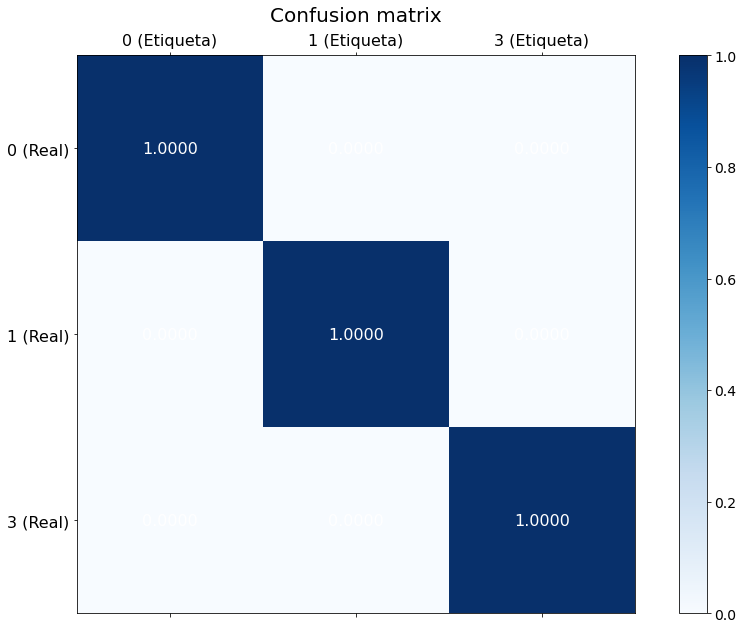

In [ ]:
cm = metrics.confusion_matrix(y_val, validacion)
plotCMa(cm,['0','1','3'])

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plt.figure(dpi=100)
plot_roc_curve(log_reg, X_val, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

<Figure size 600x400 with 0 Axes>